#Segmind - Fastest APIs for Generative Models
https://www.segmind.com/

- HTTP 요청 방식
SDK도 따로 지원하지만, 성능이 좋지 않았음.
- 테스트 방식은 prompt에 따라서 이미지 생성 결과가 달라짐.
- 인물화, 풍경화 등의 종류에 따른 제약을 피하려면, prompt를 input으로 하지 않는 API 필요
- 파리에 있는 광고 사진 같은 예시에서는 성능이 좋아보임. 현실 사진에서 활용하기 위해 개발되지 않았을까?
![스크린샷 2024-01-28 오후 4.35.48.png](data:image/png;base64,

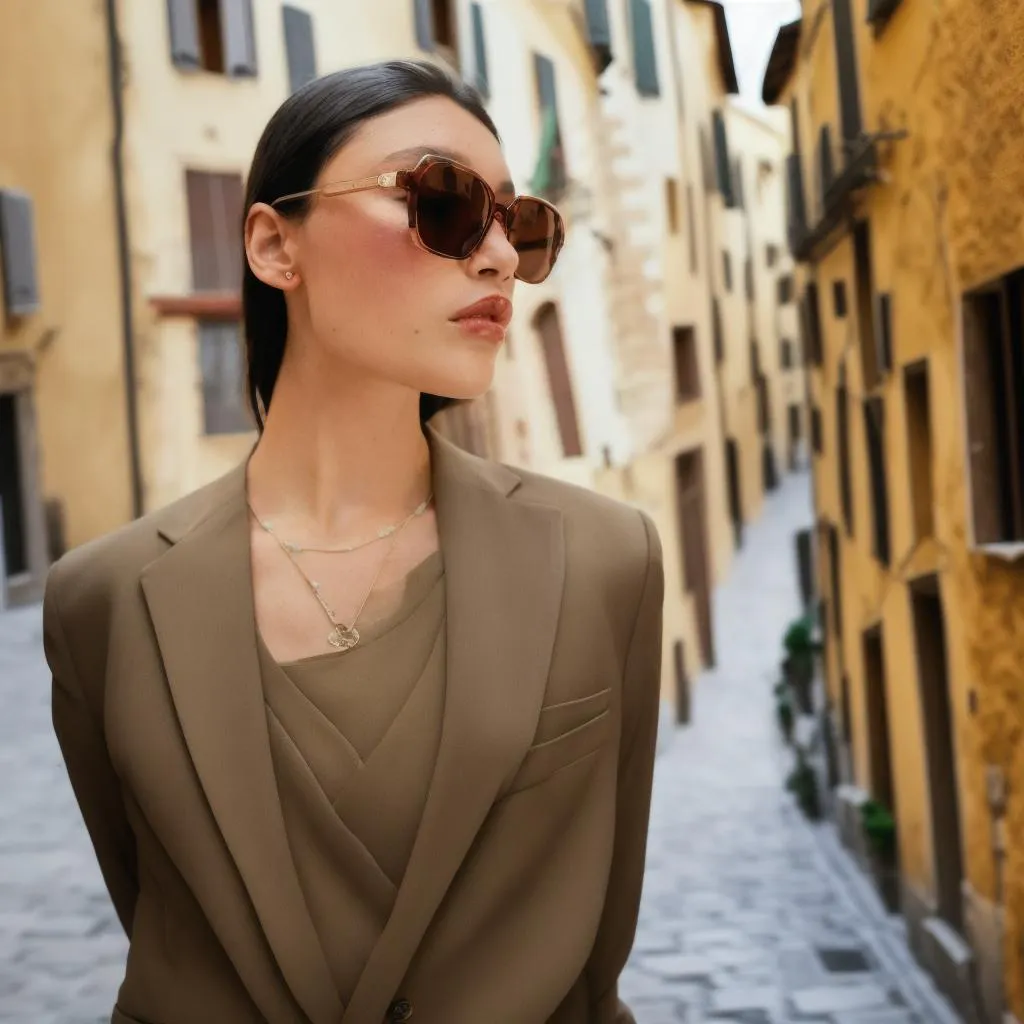

In [ ]:
image = Image.open("./image6.webp")
image

In [ ]:
import requests
from base64 import b64encode

#url image -> local
def toB64(localImagePath):
    with open(localImagePath, 'rb') as image_file:
        encoded_image = b64encode(image_file.read())
        return str(encoded_image, 'utf-8')

#개인 API 할당 후, credit 충전해야함...!(1달러 정도면 테스트 하기 굳)
api_key = "your api"
url = "https://api.segmind.com/v1/sd1.5-outpaint"

# Request payload
data = {
  "image": toB64('image4.jpeg'),
  "prompt": "in the oceans",
  "negative_prompt": "NONE",
  "scheduler": "DDIM",
  "num_inference_steps": 25,
  "img_width": 1024,
  "img_height": 1024,
  "scale": 1,
  "strength": 1,
  "offset_x": 256, #img_width//4
  "offset_y": 256, #img_width//4
  "guidance_scale": 7.5,
  "mask_expand": 8,
  "seed": 124567
}

#check your response -> 200 / others -> errors
response = requests.post(url, json=data, headers={'x-api-key': api_key})

In [ ]:
from io import BytesIO
from PIL import Image

# 응답 상태코드 확인
if response.status_code == 200 and 'image/jpeg' in response.headers.get('content-type', ''):
    # 이미지 데이터를 BytesIO 객체에 저장
    image_data = BytesIO(response.content)

    # PIL 라이브러리를 사용하여 이미지 열기
    image = Image.open(image_data)
    print(image)

    # 이미지 보여주기
    image.show()
else:
  print("error")

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x1024 at 0x79E96CD99D50>


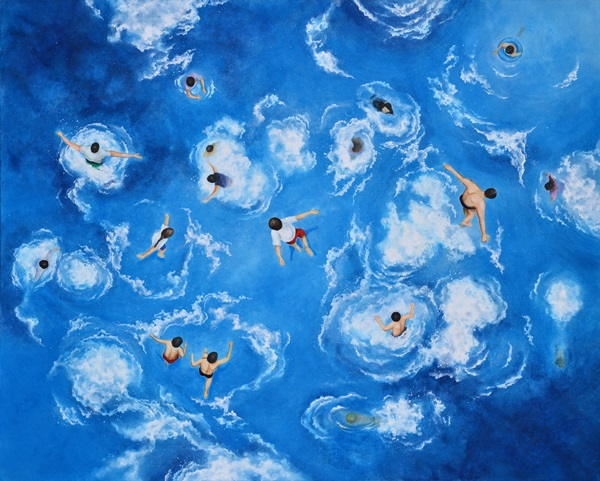

In [ ]:
image = Image.open("./image4.jpeg")
image

In [ ]:
image

Output hidden; open in https://colab.research.google.com to view.

- prompt -> in the oceans

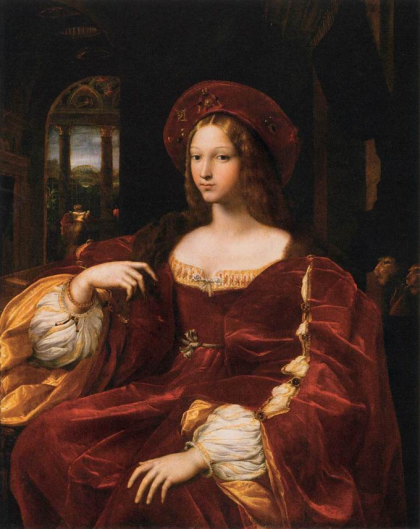

In [ ]:
image = Image.open("./image3.png")
image

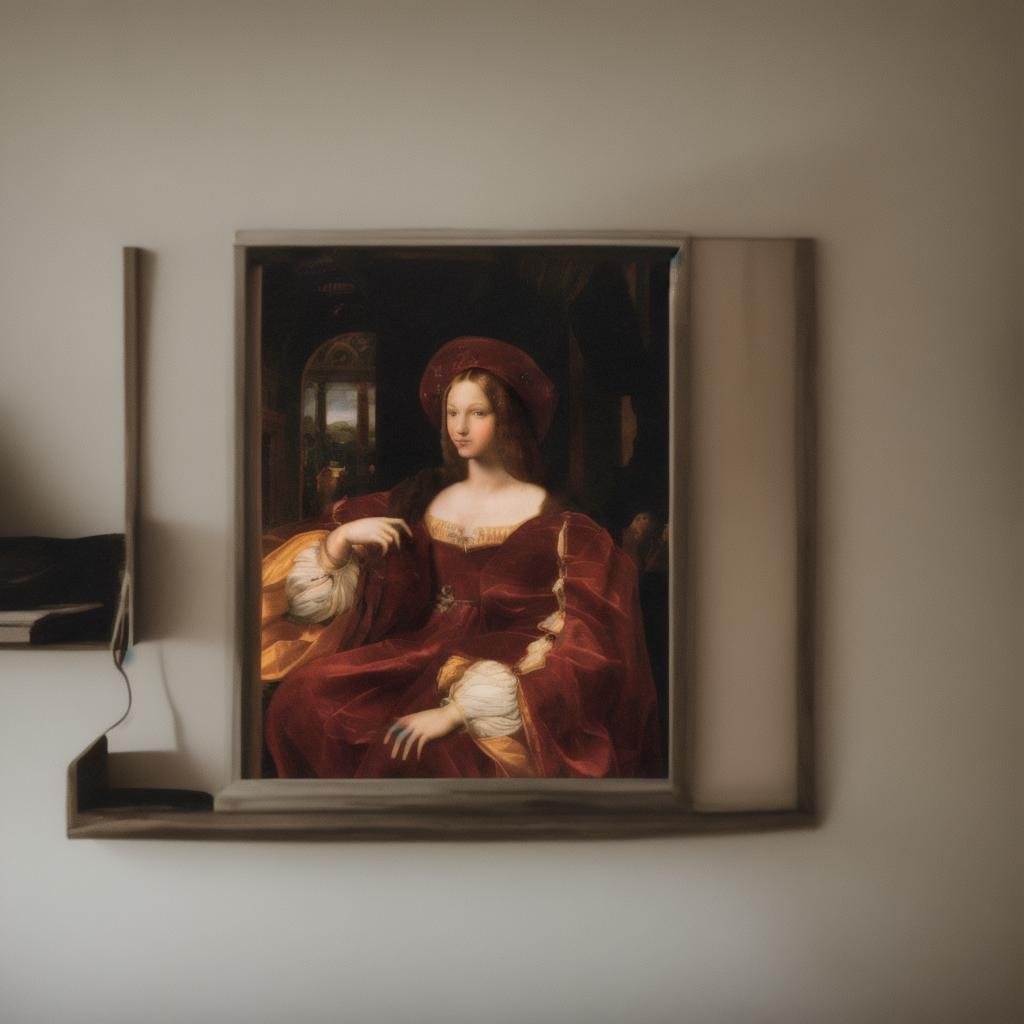

In [ ]:
image

- prompt -> girl in house

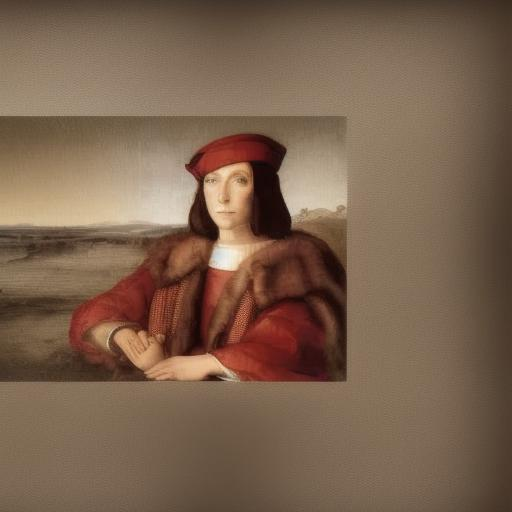

In [ ]:
image

- no prompt -> 고화질 이미지가 중요할 듯. 해당 사진은 저화질로 했을 때

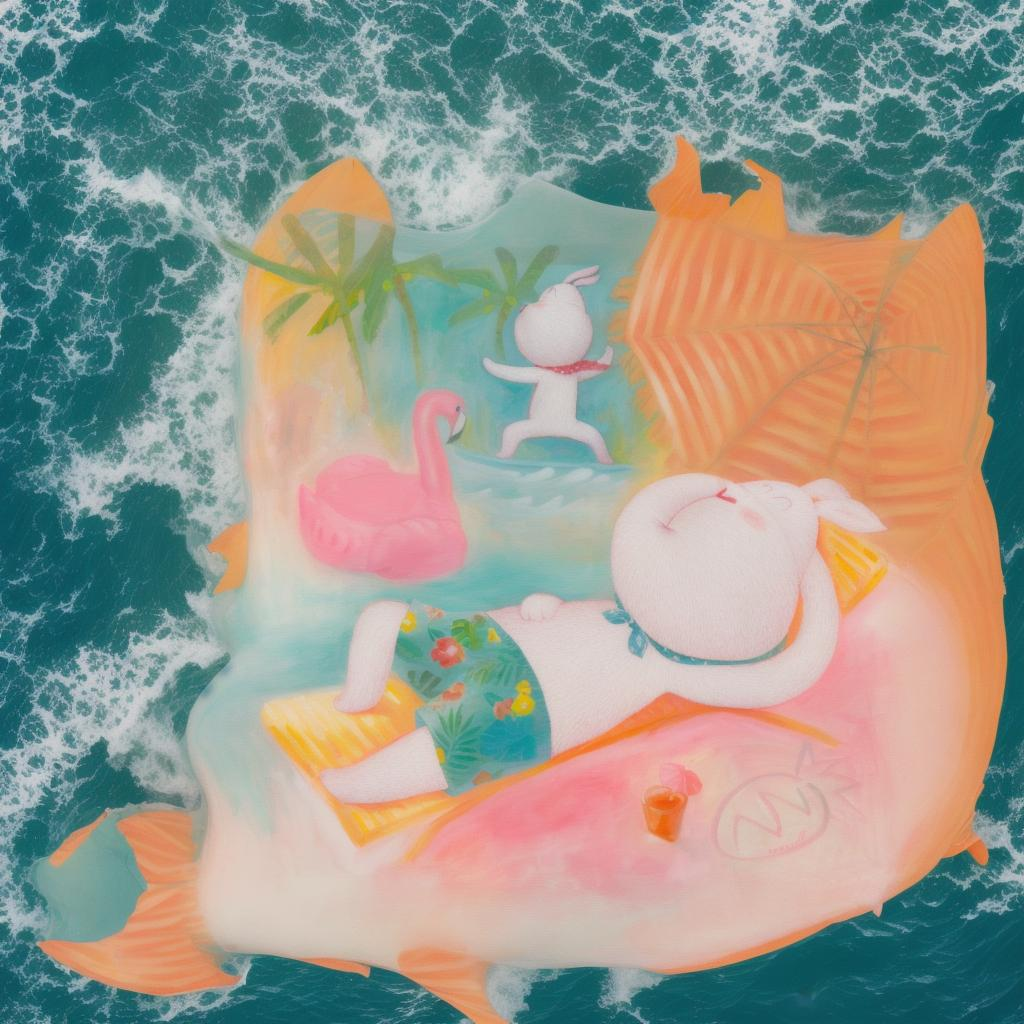

In [ ]:
image

- prompt -> in the ocean

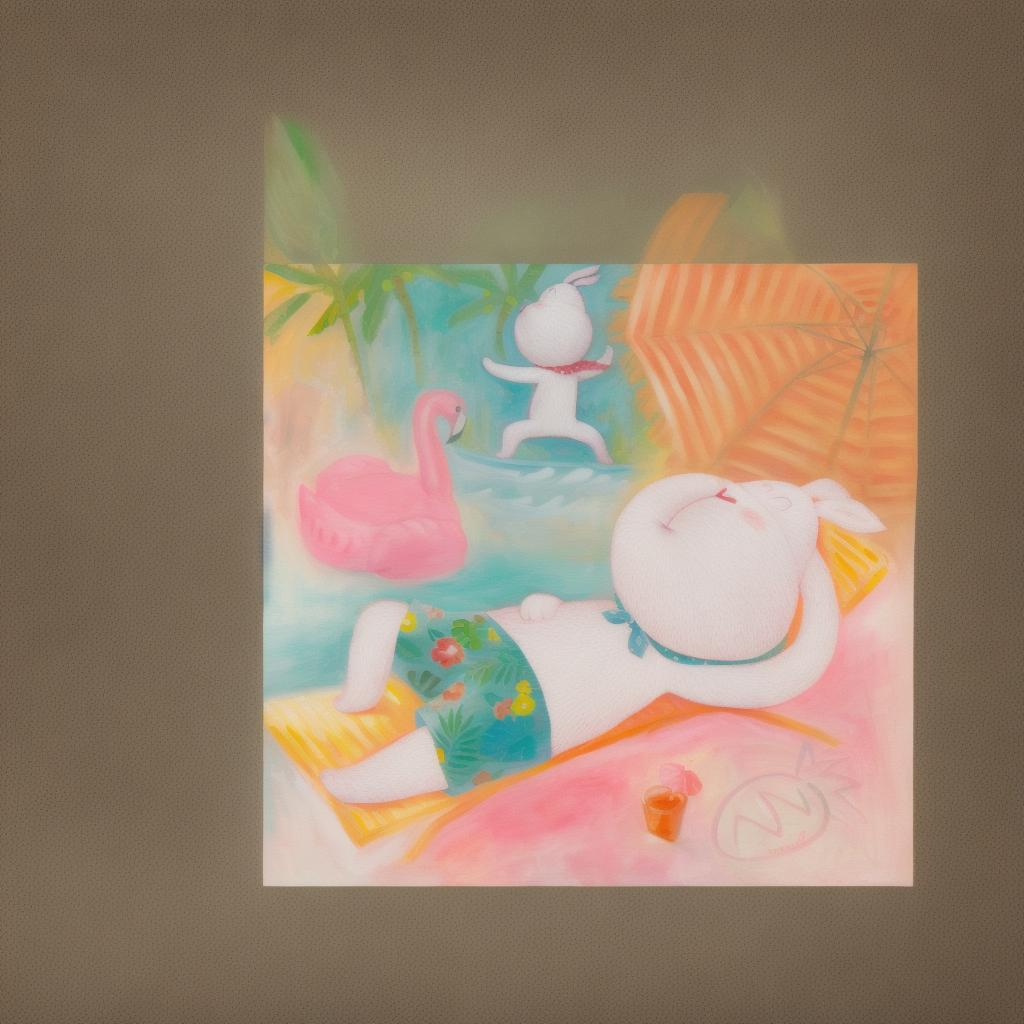

In [ ]:
image

- no prompt

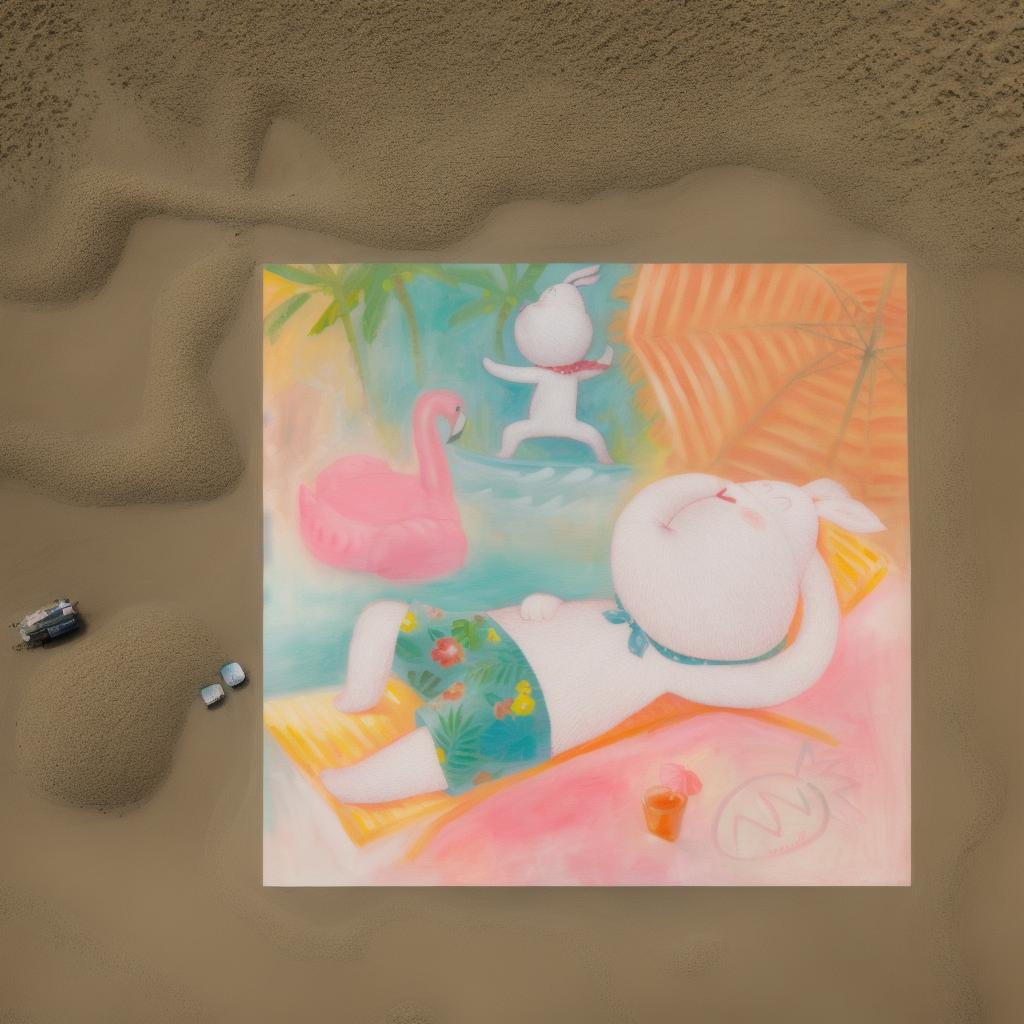

In [ ]:
image

- prompt -> in the beach

#limewire -> 유료만 outpainting 제공
- 테스트를 못해봄

In [ ]:


import requests

url = "https://api.limewire.com/api/image/inpainting"

payload = {
  "image_asset_id": "116a972f-666a-44a1-a3df-c9c28a1f56c0",
  "prompt": "A cute baby sloth"
}

headers = {
  "Content-Type": "application/json",
  "X-Api-Version": "v1",
  "Accept": "application/json",
  "Authorization": "Bearer Your API"
}

response = requests.post(url, json=payload, headers=headers)
print(response)

<Response [404]>


In [ ]:
#Novita
#HTTP 요청

In [ ]:
import requests

url = "https://api.novita.ai/v3/user"

payload = {}
headers = {
  'Authorization': 'Your API'
}

response = requests.request("GET", url, headers=headers, data=payload)

print(response.text)

{"allow_features":["upload_model"],"credit_balance":0,"free_trial":{"training":1}}


In [ ]:
import requests
import json

url = "https://api.novita.ai/v3/outpainting"

payload = {
  "image_flle": toB64('image4.jpeg'),
  "prompt": "1girl",
  "negative_prompt": "bad hands",
  "width": 1024,
  "height": 1024,
  "center_x": 0,
  "center_y": 0,
  "extra": {
      "response_image_type": "png"
  }
}

headers = {
  'Authorization': 'Your API',
  "Content-Type": "application/json",
}

response = requests.request("POST", url, headers=headers, data=payload)

print(response.text)


{"code":400,"reason":"CODEC","message":"body unmarshal proto: syntax error (line 1:1): invalid value image_flle","metadata":{}}


#Novita.ai(One AI Platform)
- No prompt로 이미지 확장이 가능.
- Python SDK: https://github.com/novitalabs/python-sdk?tab=readme-ov-file
- 42개 까지 무료로 사용 가능.
- 가장 현실적으로 사용할만 할듯.
- 시나리오 구상


1.   outpainting에 사용자 원하는 부분 선택
2.   유저 interface에서 4개 coordinate 가져오기 (ex. width=910 / height=512 / center_x=0 / center_y=0)
3. 유저 interface에서 가져온(유저가 선택한) 영역만 crop후 이미지 띄우기


In [ ]:
#pip install novita-client

In [ ]:
import os

from novita_client import NovitaClient
from novita_client.utils import base64_to_image

#NOVITA_API_URI는 무시 가능
client = NovitaClient('Your API', os.getenv('NOVITA_API_URI', None))
res = client.outpainting(
    image="image4.jpeg",
    width=910,
    height=512,
    center_x=0,
    center_y=0,
)
base64_to_image(res.image_file).save("./outpainting.png")

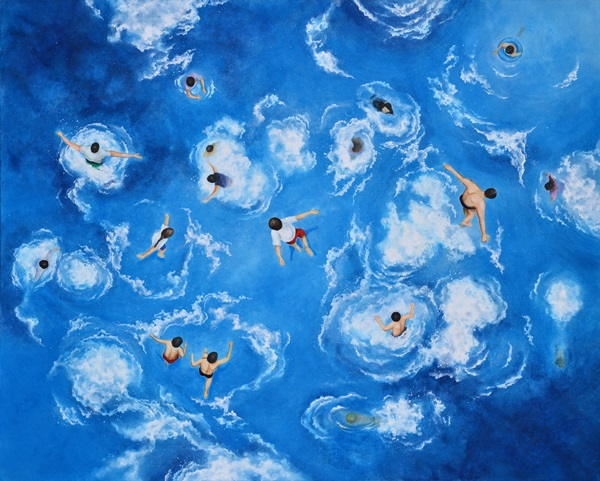

In [ ]:
image = Image.open("./image4.jpeg")
image

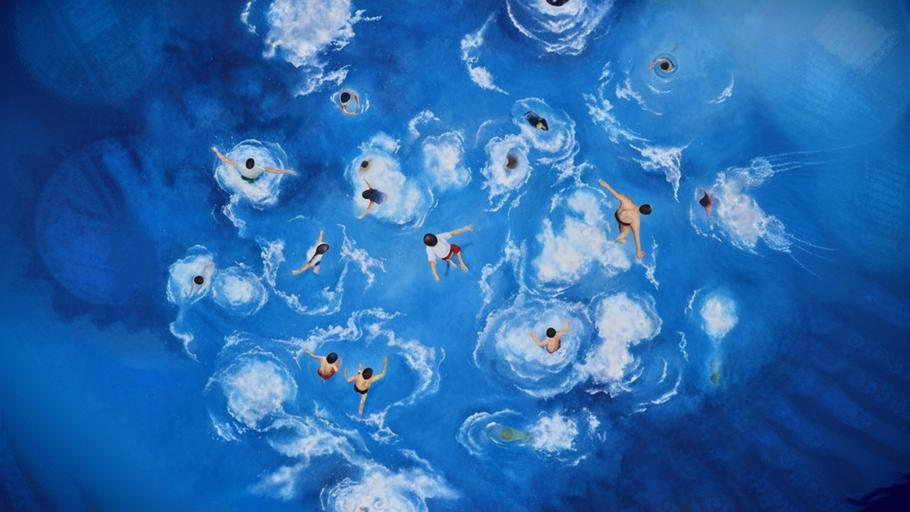

In [ ]:
image = Image.open("./outpainting.png")
image

In [ ]:
import os

from novita_client import NovitaClient
from novita_client.utils import base64_to_image

client = NovitaClient('Your API', os.getenv('NOVITA_API_URI', None))
res = client.outpainting(
    image="image3.png",
    width=910,
    height=512,
    center_x=0,
    center_y=0,
)
base64_to_image(res.image_file).save("./outpainting.png")

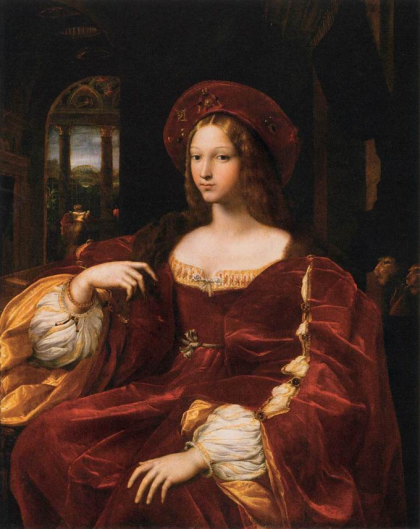

In [ ]:
image = Image.open("./image3.png")
image

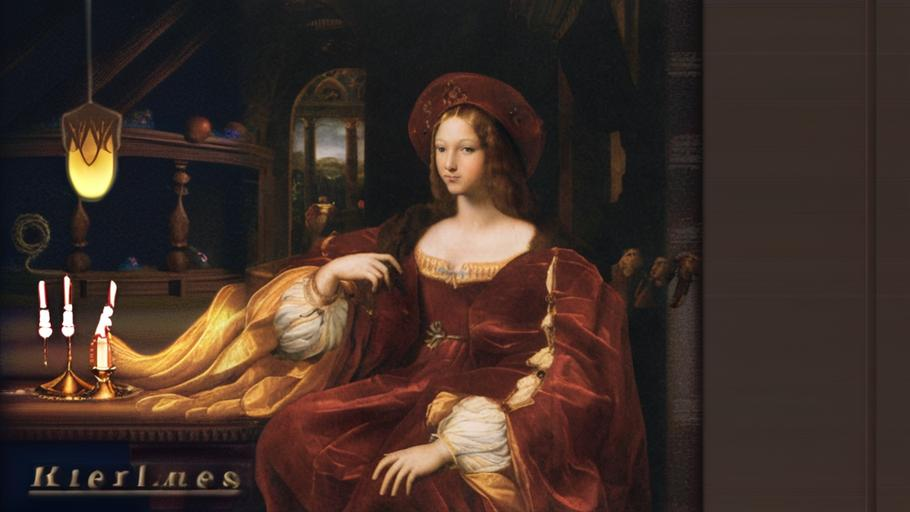

In [ ]:
image = Image.open("./outpainting.png")
image